Öncelikle veriyi işlemek ve görselleştirmemizde ihtiyacımız olan kütüphaneleri projemize dahil ediyoruz.

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Veri Toplama ve İşleme

In [65]:
# Verisetini çalışma ortamımıza eklemek
gold_data = pd.read_csv('/content/gld_price_data.csv')

Bu veri dosyasını https://www.kaggle.com/datasets/altruistdelhite04/gold-price-data adresinden aldım.Bu veri dosyası, 2290 satır ve 7 sütun içeren Virgülle Ayrılmış Değer (CSV) dosya formatında bulunmaktadır. İçerisinde 5 sütun sayısal veri tipinde olup, bir sütun ise Tarih formatındadır. Veri açıkça, Tarih sütunu içerisindeki tarihler karşısında SPX, GLD, USO, SLV, EUR/USD değişkenlerinin değerlerini göstermektedir.(Kısaca belirli değişkenlere göre zamanla değişen altın fiyatlarını içermektedir.).

Pandas kütüphanesini pd kısaltmasıyla dahil ettim ve verisetini "gold_data" isimli değişkene aktardım.Bu sayede verisetiyle ilgili işlemlerimi bu değişken üzerinden gerçekleştireceğim.

# **Keşifsel Veri Analizi (EDA - Exploratory Data Analysis)**

Görsel veya nümerik yöntemlerle, veriyi bir özet üzerinden yorumlama yaklaşımıdır. Veriyi ön işleme noktasında atılması gereken adımlardan çıkarım yapmak için kullanılacak metod ve modele kadar pek çok konuda fikir sahibi olmamızı sağlar.

# 1. Numerical EDA


Veriyi nümerik olarak özetleme yaklaşımı.

In [66]:
# Verisetindeki ilk 5 veri
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [67]:
# Verisetindeki son 5 veri
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [68]:
# Verisetindeki "satır" ve "sütun" sayısı
gold_data.shape

(2290, 6)

In [69]:
# Verisetindeki sütunların isimleri, kaç adet veri olduğu,
# kaç tanesinin dolu olduğunu gösteren kod satırı
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [70]:
# Her bir satırın boş olup olmadığı kontrolü
# eğer bir hücre boş ise karşılık gelen değer "True", aksi takdirde "False" olur.
# Yanlızca boş olan sütunların değerlerini elde etmek istiyorsanız .any() kullanılır.
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [71]:
# Verilerin istatiksel değerlerini almak
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


# 2. Visual EDA

Bir önceki adımda numeric olarak baktığımız veri kümesine görsel olarak bakma.

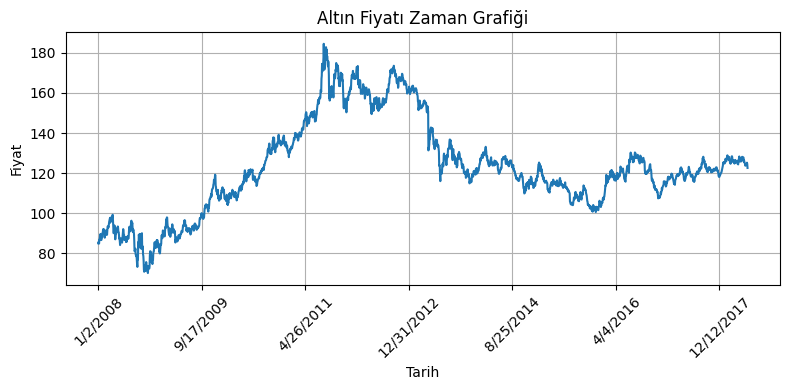

In [72]:
x = gold_data['Date']
y = gold_data['GLD']
plt.figure(figsize=(8, 4))
plt.plot(x, y)
plt.xlabel('Tarih')
plt.ylabel('Fiyat')
plt.title('Altın Fiyatı Zaman Grafiği')
plt.xticks(x[::365], rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**Korelasyon**:

  1. Pozitif Korelsayon

  2. Negatif Korealasyon



Korelasyon, iki değişken arasındaki ilişkiyi ölçen istatistiksel bir kavramdır. Genellikle Pearson korelasyon katsayısı kullanılarak ifade edilir. Bu katsayı, -1 ile 1 arasında değer alır:

1'e yaklaşan pozitif bir korelasyon, iki değişken arasında güçlü bir doğrusal ilişki olduğunu gösterir. Yani bir değişken artarken diğer değişken de artar.

-1'e yaklaşan negatif bir korelasyon, iki değişken arasında güçlü bir ters doğrusal ilişki olduğunu gösterir. Yani bir değişken artarken diğer değişken azalır.

0'a yakın bir korelasyon ise iki değişken arasında bir ilişkinin olmadığını veya çok zayıf bir ilişkinin olduğunu gösterir.

Korelasyon, değişkenler arasındaki ilişkinin yönü ve gücü hakkında bilgi sağlar, ancak nedensel bir ilişkiyi doğrulamaz. Yani, korelasyon sadece değişkenler arasındaki ilişkinin varlığını ve yoğunluğunu ölçer, ancak bir değişkenin diğerini nedensel olarak etkileyip etkilemediğini belirtmez.

Burada veri kümesinden yalnızca sayısal verilere sahip sütunları seçip sonrasında bu sayısal veriler arasındaki korelasyonu hesapladık.

In [73]:
numerical_data = gold_data.select_dtypes(include='number')
correlation = numerical_data.corr()

gold_data.select_dtypes(include='number'): gold_data veri kümesinden sadece sayısal verilere sahip sütunları seçer. Bu işlem, genellikle veri kümesindeki yalnızca sayısal verilerle çalışmak istediğinizde kullanılır.

correlation = numerical_data.corr(): Seçilen sayısal veriler arasındaki korelasyonu hesaplar. corr() işlevi, DataFrame içindeki tüm sayısal sütunlar arasındaki korelasyonu hesaplar ve sonuç olarak bir korelasyon matrisi döndürür. Bu matrisin her bir hücresi, karşılık gelen iki değişken arasındaki korelasyon katsayısını içerir. Örneğin, (0,1) hücresi, 0 ve 1 numaralı sütunlar arasındaki korelasyonu içerir.

<Axes: >

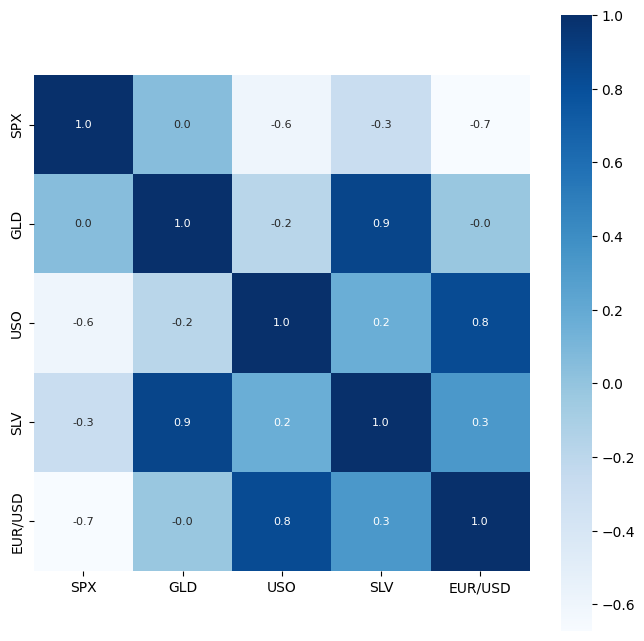

In [74]:
# Hesapladığımız korelasyonu görüntü olarak göstermek için ısı haritası oluşturduk
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [75]:
# GLD'nin korelasyon değerlerini yazdırmak
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<Axes: xlabel='GLD', ylabel='Count'>

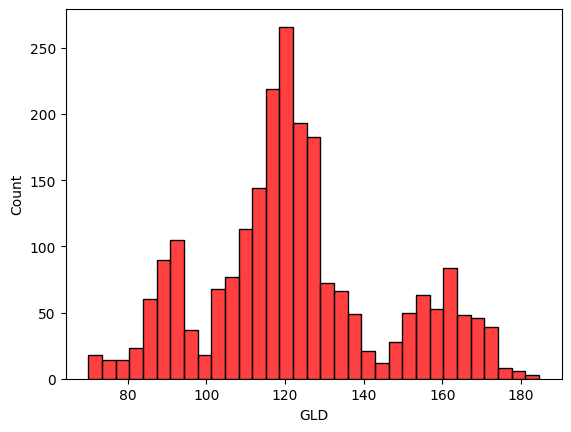

In [76]:
# GLD Fiyatının dağılımının kontrol edilmesi
sns.histplot(gold_data['GLD'], color='red')

## **Özellikleri ve Hedefi Bölme**






In [77]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

   X = gold_data.drop(['Date','GLD'],axis=1): gold_data veri setinden 'Date' ve 'GLD' sütunlarını çıkararak bağımsız değişkenleri (X) oluşturur. Yani, 'Date' ve 'GLD' sütunları dışındaki tüm sütunlar X değişkenine atanır.

  Y = gold_data['GLD']: 'GLD' sütununu bağımlı değişken (Y) olarak belirler. Yani, 'GLD' sütunu Y değişkenine atanır.

In [78]:
# Bağımsız değişkenleri yazdırmak
print(x)

0        1/2/2008
1        1/3/2008
2        1/4/2008
3        1/7/2008
4        1/8/2008
          ...    
2285     5/8/2018
2286     5/9/2018
2287    5/10/2018
2288    5/14/2018
2289    5/16/2018
Name: Date, Length: 2290, dtype: object


In [79]:
# Bağımlı değişkenleri yazdırmak
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


# Veri Ön İşleme

In [80]:
# Veri setini eğitim ve test kümelerine bölme
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

train_test_split(X, Y, test_size = 0.2, random_state=2): Bu fonksiyon, bağımsız değişkenler (X) ve bağımlı değişken (Y) verilerini alır ve bunları eğitim ve test alt kümelerine böler. test_size = 0.2 parametresi, verinin %80'ini eğitim kümesine ve %20'sini test kümesine ayırmak için kullanılır. random_state=2 parametresi ise rastgele bölme işleminin tekrarlanabilirliğini sağlar.

Bu fonksiyonun dönüş değerleri sırasıyla X_train, X_test, Y_train ve Y_test olmak üzere dört değişkendir.

# Model Seçimi ve Model Eğitimi : Random Forest Regressor



In [81]:
regressor = RandomForestRegressor(n_estimators=100)

RandomForestRegressor(n_estimators=100): Burada Random Forest Regresyon modelini oluşturduk n_estimators parametresi, oluşturulacak olan ağaç sayısını belirtir. Burada n_estimators=100 olarak belirtilmiş, yani model 100 tane karar ağacı içerecek şekilde oluşturuldu.

Bu değer, genellikle modelin performansı ve hesaplama süresi arasında bir denge sağlamak için seçilir.

In [82]:
# Modeli eğitmek
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Önceden hazırlayıp önişlediğimiz "x_train", "y_train" değişkenleriyle modelimizi eğittik.

### Model Değerlendirmesi

In [83]:
# Test Verilerinde düzeltme
test_data_prediction = regressor.predict(X_test)

   regressor.predict(X_test):  oluşturulan Random Forest Regresyon modelini kullanarak test veri kümesindeki özellikler (X_test) üzerinde tahminler yaptık. Tahmin edilen değerleri, test_data_prediction değişkenine atadık.

Bu tahminler, modelin test veri kümesi üzerinde ne kadar iyi performans gösterdiğini değerlendirmek için kullanılabilir. Tahminler gerçek değerlerle karşılaştırılarak modelin doğruluğu hakkında bilgi edinilebilir.

In [84]:
# Test veri kümesindeki her bir örneğin tahmin edilen değerlerini içeren bir diziyi yazdırmak.
print(test_data_prediction)

[168.59159929  82.31260005 114.92930009 127.55810095 121.27540051
 154.0269003  150.05289788 125.8851005  117.43029863 126.01249989
 116.40340137 172.32980088 141.05159764 167.91779889 115.00500011
 117.80160085 137.25380341 169.95720028 159.22849952 153.09450022
 155.16010004 125.58960028 175.66389945 157.20500289 125.19230046
  94.00380003  77.07680025 120.47860051 119.07759925 167.43789967
  88.21720044 125.32830022  90.91200056 117.66240039 121.19389922
 135.19719975 115.50390144 115.71400107 146.10159976 107.07870076
 104.78080185  87.0558979  126.47330011 117.89650025 153.18549904
 119.61109993 109.13159882 108.05659881  93.20100045 127.21509743
  74.46630008 113.60249906 120.43289897 111.23299913 118.86189905
 121.06739947 158.33440097 167.53540056 146.55479717  86.4340996
  94.29359992  86.90379909  90.7153001  119.16470063 126.45120033
 127.39369985 169.2105     122.27549951 117.49739871  98.48850022
 168.36180106 143.05379858 132.53540412 121.15910141 122.49819924
 119.662800

In [85]:
# Ortalama mutlak hata hesaplama
mae_error = Y_test - test_data_prediction
mae = np.mean(np.abs(mae_error))
print("Ortalama Mutlak Hata (MAE):", mae)

Ortalama Mutlak Hata (MAE): 1.3032049655458522


# Hiperparametre Optimizasyonu

In [86]:
from sklearn.model_selection import RandomizedSearchCV

# Hiperparametrelerin olası değer aralıklarını tanımlama
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Rastgele arama için modeli ve parametrelerin olası değerlerini belirleme
random_search = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=param_grid,
                                   n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Rastgele aramayı uygulama
random_search.fit(X_train, Y_train)

# En iyi parametreleri ve skorları görüntüleme
print("En iyi parametreler: ", random_search.best_params_)
print("En iyi skor: ", random_search.best_score_)

# En iyi tahmin modelini alma
best_regressor = random_search.best_estimator_

# Test verisi üzerinde tahmin yapma
test_data_prediction = best_regressor.predict(X_test)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
En iyi parametreler:  {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 50, 'bootstrap': True}
En iyi skor:  0.9878771636812068


In [87]:
# R kare hatası hesaplama
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R kare hata : ", error_score)

R kare hata :  0.9889172693297074


In [88]:
# Ortalama mutlak hata hesaplama
mae_error = Y_test - test_data_prediction
mae = np.mean(np.abs(mae_error))
print("Ortalama Mutlak Hata (MAE):", mae)

Ortalama Mutlak Hata (MAE): 1.276896560895191


Bir Grafikteki Gerçek Değerleri ve Tahmin Edilen Değerleri Karşılaştırma

In [89]:
Y_test = list(Y_test)

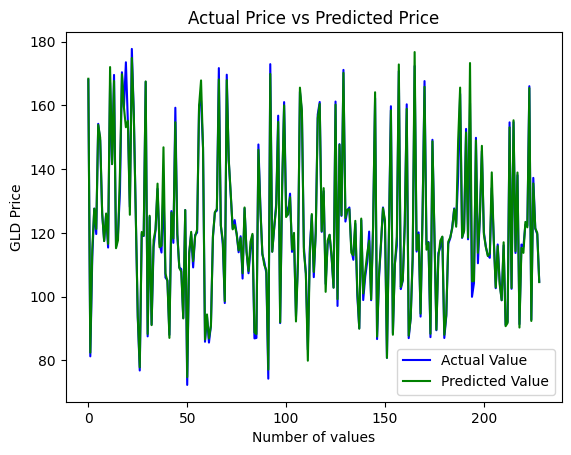

In [90]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()